**Question 1** : How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

**Answer 1**<br>
Lets understand this by an example.<br>
Firstly the number of elements in a matrix is equal to the product of its rows and columns.<br>
Let A be a matrix of order (2,3)<br>
Let B be a matrix of order (3,2)<br>
After multiplying the matrix the resulting matrix is of order (2,2).<br>
Let the resulting matrix be C of order (2,2).<br>
We notice that the number of multiplication taking place in C[i][j] is one more than the number of addition taking place after multiplying the i-th row of matrix A and j-th column of matrix B.<br>
Therfore the total number of multiplication happening to perform a matrix multiplication between a (n, k) and (k, m) matrix = **n x k x m**<br>
And the total number of addition happening to perform a matrix multiplication between a (n, k) and (k, m) matrix = **n x (k-1) x m**<br>

**Question 2** : Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [39]:
import time
import numpy as np

list_start = time.time()
def mul(A,B):
    C=[]
    for i in range(len(A)):
        row_sum=[]
        for j in range(len(B[0])):
            sum=0
            for k in range(len(B)):
                sum += A[i][k] * B[k][j]
            row_sum.append(sum)
        C.append(row_sum)
    return C

A=[[1,2,3],[4,5,6]]
B=[[7,8],[9,10],[11,12]]

row_element= mul(A,B)
print("Resulting Matrix for List: ",row_element)
list_end = time.time()

np_start = time.time()
print("Resulting Matrix for Numpy: ",np.matmul(A,B))
np_end = time.time()

print("Time for List",list_end-list_start)
print("Time for Numpy",np_end-np_start)

Resulting Matrix for List:  [[58, 64], [139, 154]]
Resulting Matrix for Numpy:  [[ 58  64]
 [139 154]]
Time for List 0.001767873764038086
Time for Numpy 0.0


Time for List 0.001767873764038086<br>
Time for Numpy 0.0<br>

Time taken by list is more than numpy because list uses 3 loop to multipy 2 matrix whereas numpy is optimised for numerical operation which makes it more faster.<br>

**Question 3** : Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

**Answer 3**<br>
Using the above method the time complexity of finding the median of the array is O(n<sup>2</sup>).<br>
Because finding the median of the array using the above method we first iterate to over n/2 times in the array and remove the n/2 maximum elements. After that we find the maximum element in the resulting array and that how we can find the index of median of the array.<br>
O(n*n/2)<br>

Better Approch : Sort the array first and then and get the middle index of the array. if n(number of elements of array) is odd then return the element at the middle index and if n is even then take the average of the mid and (mid+1) index element and return the average

In [8]:
import numpy as np
import time

list1 = [7,4,2,5,3]
n = len(list1)

my_start = time.time()
list1.sort()
if n%2==0:
    mid = n//2
    average = (list1[mid-1] + list1[mid])/2
    print("Median is",average)
else:
    mid = n//2
    print("Median is",list1[mid])
my_end = time.time()

np_start = time.time()
print("Median of the array with numpy",np.median(list1))
np_end = time.time()
    
print("Time taken for my method ",my_end-my_start)
print("Time taken for numpy ",np_end-np_start)

Median is 4
Median of the array with numpy 4.0
Time taken for my method  0.0027549266815185547
Time taken for numpy  0.0


**Question 4** : What is the gradient of the following function with respect to x and y?<br>
<div align="center">
    x<sup>2</sup>y + y<sup>3</sup>sin(x)
</div>

**Answer 4**<br>
To find the gradient of the function , we have to differentiate the function with respect to x and y respectively.<br>
So the gradient of the function would be<br>
Gradient with respect to x : 2xy + y<sup>3</sup>cos(x)<br>
Gradient with respect to y : x<sup>2</sup> + 3y<sup>2</sup>sin(x)<br>
Gradient of the function = 2xy + y<sup>3</sup>cos(x) + x<sup>2</sup> + 3y<sup>2</sup>sin(x)<br>

**Question 5** : Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [5]:
pip install jax jaxlib numpy


  Obtaining dependency information for jax from https://files.pythonhosted.org/packages/28/d0/edf653ea02628f2130ea2557f96d02b264768a2f54d22a9c002c7119cb1d/jax-0.4.23-py3-none-any.whl.metadata
  Obtaining dependency information for jaxlib from https://files.pythonhosted.org/packages/67/c7/9ba88bc705a6dd87838c4bffa578b524c9a558ef6f16968a2c85777c14a6/jaxlib-0.4.23-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for ml-dtypes>=0.2.0 from https://files.pythonhosted.org/packages/a4/db/1784b87285588788170f87e987bfb4bda218d62a70a81ebb66c94e7f9b95/ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 1.1 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.7 MB 1.7 MB/s eta 0:00:01
   -------- ------------------------------- 0.4/1.7 MB 2.6 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.7 MB 3.3 MB/s eta 0:00:01
   -----


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import numpy as np
import random
import jax
import jax.numpy as jnp

def my_method(x,y):
    df_dx = 2*x*y + (y**3)*jnp.cos(x)
    df_dy = x**2 + 3*(y**2)*jnp.sin(x)
    return df_dx,df_dy

def function(x,y):
    return (x**2)*y + (y**3)*jnp.sin(x)

x=np.random.randint(100,size=(50)).astype(float)
y=np.random.randint(100,size=(50)).astype(float)

x_j = jnp.array(x)
y_j = jnp.array(y)

my,my2 = my_method(x_j,y_j)
print("Result for My Method:",my)

jax_method=jax.grad(lambda x,y: jnp.sum(function(x,y)))
jax_result=jax_method(x_j,y_j)
print("\nResult for JAX Method",jax_result)

match= jnp.allclose(my[0],jax_result[0]) and jnp.allclose(my[1],jax_result[1])
print("\nMatching Gradients:", match)

Result for My Method: [ 9.49668500e+05 -3.13919000e+05  2.15160400e+03  7.94496016e+04
 -1.38684521e+03 -3.60280469e+04  8.66346250e+04 -1.61596203e+05
  4.44956289e+04  3.74813751e+02  7.60331250e+03  6.47970977e+04
  1.55124678e+04 -3.34366969e+05  1.27488159e+03 -4.11413711e+04
  5.31318359e+03  0.00000000e+00  5.04335430e+04  1.72467786e+03
 -3.70291312e+05  4.02339922e+04  3.57237207e+03 -1.74687062e+05
 -1.68516934e+04 -1.60063232e+02  3.16813622e+01 -2.11394678e+03
 -1.65785840e+03 -6.98381750e+05 -3.92850438e+05  5.94897522e+02
  3.31983125e+05  2.80301969e+05  1.31871625e+05  6.54370938e+05
 -2.16136367e+04 -4.15966625e+05 -1.27903430e+03  3.75014062e+05
  9.42888733e+02 -6.54515500e+05  2.07197778e+03  7.03002344e+04
  3.16252562e+05  1.00771695e+05 -6.79800703e+04 -1.14342273e+05
 -7.42941094e+04 -2.57694570e+04]

Result for JAX Method [ 9.49668500e+05 -3.13919000e+05  2.15160400e+03  7.94496016e+04
 -1.38684521e+03 -3.60280469e+04  8.66346250e+04 -1.61596203e+05
  4.4495628

**Question 6** : Use sympy to confirm that you obtain the same gradient analytically.<br>

In [2]:
from sympy import *
x=Symbol('x')
y=Symbol('y')

df_dx =diff((x**2)*y + (y**3)*sin(x),x)
df_dy =diff((x**2)*y + (y**3)*sin(x),y)

print(df_dx+df_dy)

x**2 + 2*x*y + y**3*cos(x) + 3*y**2*sin(x)


**Question 7** : Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [39]:
my_dict = {
    2022:{
        "Branch 1":{
            "Roll Number":1,"Name":N,
            "Marks":{
                "Maths":100,"English":70
            }
        },
        "Branch 2" : None
    },
    2023:{
        "Branch 1":None,
        "Branch 2":None
    },
    2024:{
        "Branch 1":None,
        "Branch 2":None
    },
    2025:{
        "Branch 1":None,
        "Branch 2":None
    }
}

print(my_dict)

{2022: {'Branch 1': {'Roll Number': 1, 'Name': <function N at 0x000001BEE78111C0>, 'Marks': {'Maths': 100, 'English': 70}}, 'Branch 2': None}, 2023: {'Branch 1': None, 'Branch 2': None}, 2024: {'Branch 1': None, 'Branch 2': None}, 2025: {'Branch 1': None, 'Branch 2': None}}


**Question 8** : Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.<br>

In [53]:

class Year:
    def __init__(self,year,branches=None):
        self.year= year
        if branches is None:
            branches = []
        else:
            self.branches = branches

class Branch:
    def __init__(self,branch_name,students=None):
        self.branch_name = branch_name
        if students is None:
            students= []
        else:
            self.students = students

class Student:
    def __init__(self,roll,name,marks):
        self.roll = roll
        self.name = name
        self.marks = marks

student_1=Student(1,'N',{"Maths":100,"English":70})
branch_1= Branch("Branch 1",[student_1])
branch_2 =Branch("Branch 2")

y_2022=Year(2022,[branch_1,branch_2])
y_2023=Year(2023,[Branch("Branch 1"),Branch("Branch 2")])
y_2024=Year(2024,[Branch("Branch 1"),Branch("Branch 2")])
y_2025=Year(2025,[Branch("Branch 1"),Branch("Branch 2")])

db_years= [y_2022,y_2023,y_2024,y_2025]

**Question 9** : Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.<br>
1. y=x<br>
2. y=x<sup>2</sup><br>
3. y=x<sup>3</sup>/100<br>
4. y=sin(x)<br>
5. y=sin(x)/x<br>
6. y=log(x)<br>
7. y=e<sup>x</sup><br>

Text(0, 0.5, 'y')

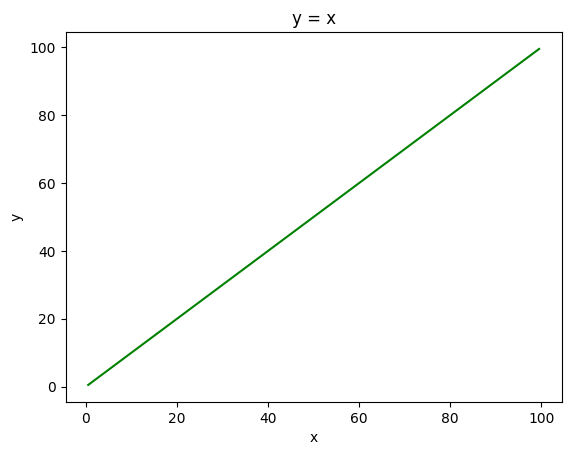

In [13]:
# For y=x
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.arange(0.5,100.0,0.5)
y=x

plt.plot(x,y,color='g')
plt.title('y = x')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

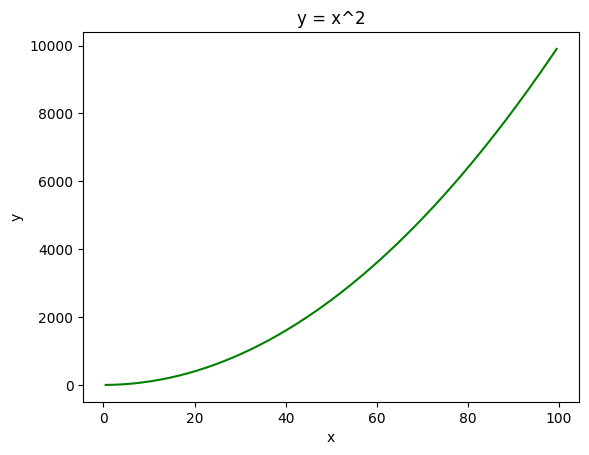

In [14]:
# For y=x**2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.arange(0.5,100.0,0.5)
y=x**2

plt.plot(x,y,color='g')
plt.title('y = x^2')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

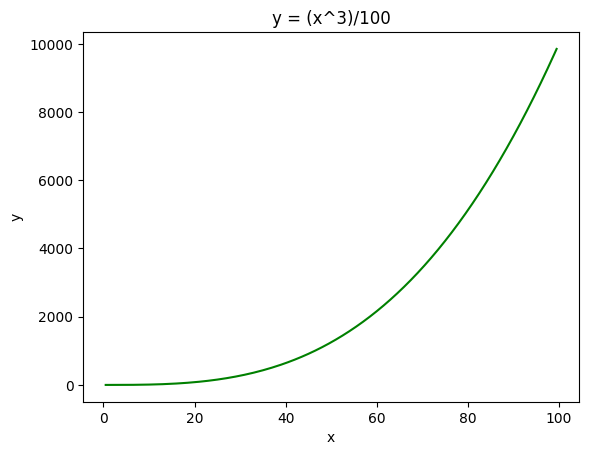

In [15]:
# For y=x**3/100
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.arange(0.5,100.0,0.5)
y=(x**3)/100

plt.plot(x,y,color='g')
plt.title('y = (x^3)/100')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

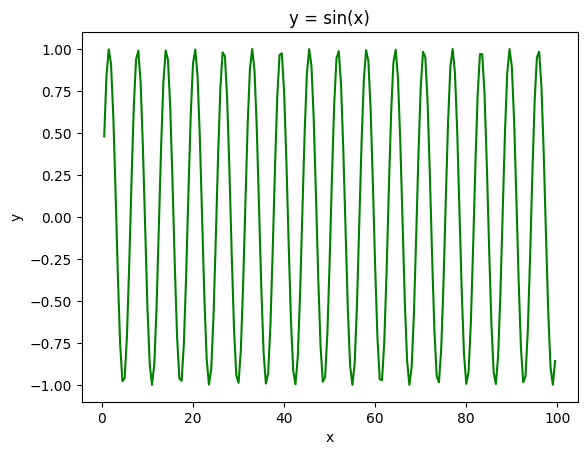

In [17]:
# For y=sin(x)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.arange(0.5,100.0,0.5)

plt.plot(x,np.sin(x),color='g')
plt.title('y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

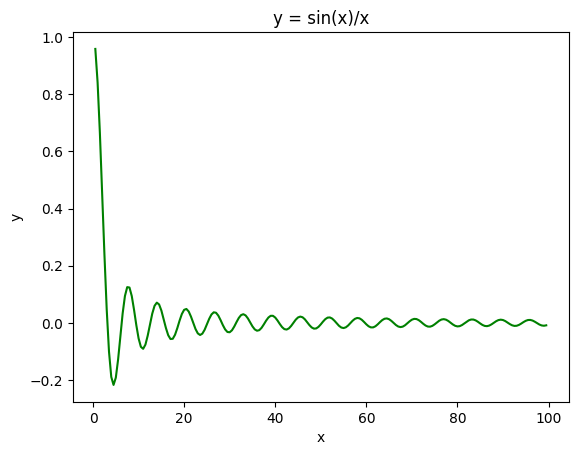

In [18]:
# For y=sin(x)/x
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.arange(0.5,100.0,0.5)

plt.plot(x,np.sin(x)/x,color='g')
plt.title('y = sin(x)/x')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

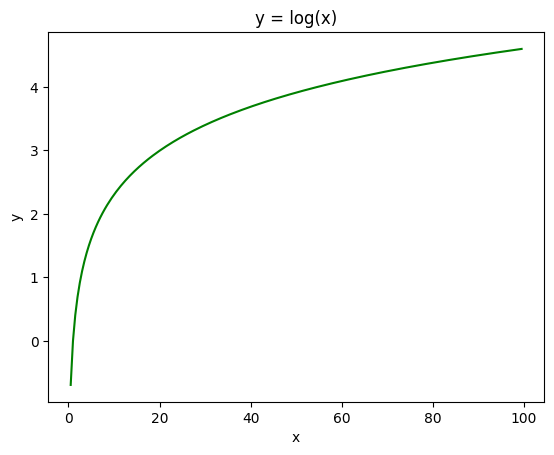

In [19]:
# For y=log(x)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.arange(0.5,100.0,0.5)

plt.plot(x,np.log(x),color='g')
plt.title('y = log(x)')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

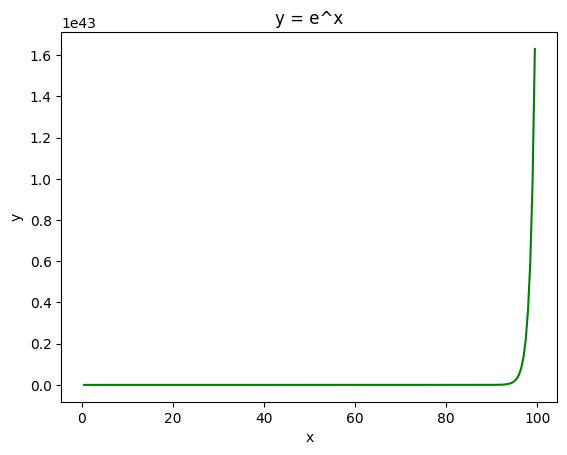

In [20]:
# For y=e^x
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.arange(0.5,100.0,0.5)

plt.plot(x,np.exp(x),color='g')
plt.title('y = e^x')
plt.xlabel('x')
plt.ylabel('y')

**Question 10** : Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [57]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1,2,size=(20, 5))
df = pd.DataFrame(matrix, index=range(20), columns=list('abcde'))
print(df,'\n')
df_std = df[['a','b','c','d','e']].std()
print("Higest Standard Deviation belongs to column",df_std.idxmax(),"is",max(df[['a','b','c','d','e']].std()),'\n')

df_mean= df.mean(axis = 0)
print("Lowest Mean belongs to column",df_mean.idxmin(),"is",min(df_mean),'\n')

           a         b         c         d         e
0   1.389030  1.867732  1.731420  1.453936  1.723844
1   1.712170  1.442486  1.414052  1.275125  1.036486
2   1.205723  1.743553  1.320704  1.368052  1.466935
3   1.240549  1.483914  1.808334  1.321032  1.844745
4   1.311267  1.403956  1.133505  1.398395  1.207265
5   1.306670  1.323114  1.742179  1.041633  1.100890
6   1.637381  1.968126  1.480214  1.376088  1.659127
7   1.880090  1.907052  1.514605  1.183185  1.983384
8   1.559828  1.329998  1.707561  1.802194  1.716630
9   1.081106  1.646506  1.648383  1.824773  1.580897
10  1.140792  1.020874  1.026502  1.189644  1.588725
11  1.891690  1.432832  1.154655  1.995294  1.165033
12  1.081511  1.633374  1.667897  1.933000  1.852308
13  1.666193  1.828219  1.515687  1.144429  1.843513
14  1.140456  1.292212  1.219824  1.572541  1.222291
15  1.044428  1.407130  1.740286  1.378722  1.778371
16  1.799427  1.410500  1.281150  1.926876  1.526159
17  1.498764  1.849641  1.570871  1.331113  1.

**Question 11**: Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [80]:
def f(row):
    return row['a']+row['b']+row['c']+row['d']+row['e']

def g(f):
    if(f>8):
        return "GT8"
    else:
        return "LT8"

def num(g):
    count=0
    if g=="LT8":
        count+=1
    return count

df['f']=df.apply(f,axis=1)
df['g']=df['f'].apply(g)

count = sum(df['g'].apply(num))
print(df,'\n')
print("Number of rows in the dataframe where the value in the column “g” is “LT8” is",count)

std_l= df[df['g']=='LT8']['f'].std()
std_g= df[df['g']=='GT8']['f'].std()

print("Standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” is",std_l)
print("Standard deviation of the column “f” for the rows where the value in the column “g” is “GT8” is",std_g)

           a         b         c         d         e         f    g
0   1.389030  1.867732  1.731420  1.453936  1.723844  8.165962  GT8
1   1.712170  1.442486  1.414052  1.275125  1.036486  6.880318  LT8
2   1.205723  1.743553  1.320704  1.368052  1.466935  7.104966  LT8
3   1.240549  1.483914  1.808334  1.321032  1.844745  7.698573  LT8
4   1.311267  1.403956  1.133505  1.398395  1.207265  6.454388  LT8
5   1.306670  1.323114  1.742179  1.041633  1.100890  6.514487  LT8
6   1.637381  1.968126  1.480214  1.376088  1.659127  8.120936  GT8
7   1.880090  1.907052  1.514605  1.183185  1.983384  8.468315  GT8
8   1.559828  1.329998  1.707561  1.802194  1.716630  8.116211  GT8
9   1.081106  1.646506  1.648383  1.824773  1.580897  7.781665  LT8
10  1.140792  1.020874  1.026502  1.189644  1.588725  5.966537  LT8
11  1.891690  1.432832  1.154655  1.995294  1.165033  7.639503  LT8
12  1.081511  1.633374  1.667897  1.933000  1.852308  8.168090  GT8
13  1.666193  1.828219  1.515687  1.144429  1.84

**Question 12** : Write a small piece of code to explain broadcasting in numpy.

Broadcasting is a tool in Numpy that helps to perform operation on matrix(arrays) of various dimensions with the condition that it is compatible.<br>
In the below example we have taken a matrix of (2 X 3) and we are adding a scalar value 3 to it. <br>
Thanks to Broadcasting that we do not have to make a array of similar dimension.

In [6]:
import numpy as np
m = np.array([[3,4,5],
             [7,4,2]])

print("Original Matrix\n",m,"\n")
matrix  = m + 3
print("Matrix after Broadcasting\n",matrix,"\n")

Original Matrix
 [[3 4 5]
 [7 4 2]] 

Matrix after Broadcasting
 [[ 6  7  8]
 [10  7  5]] 



**Question 13** : Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [2]:
import numpy as np

str = input()
elements = list(map(int,str.split()))
np_arr = np.array(elements)

store =0

for i in range(1,len(np_arr)):
    if(np_arr[i]<np_arr[store]):
        store = i

print(store)

print(np.argmin(np_arr))
print("Are they equal :",(store)==np.argmin(np_arr))

2
2
Are they equal : True
